In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("auto_insurance.csv")

In [3]:
dft=df.copy()

In [4]:
dft.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
print(f"THE SHAPE OF THE DATASET IS {dft.shape}")

THE SHAPE OF THE DATASET IS (1000, 40)


In [6]:
print(f"THE COLUMNS PRESENT ARE {dft.columns.to_list()}")

THE COLUMNS PRESENT ARE ['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', '_c39']


THERE ARE TOTAL 40 COLUMNS PRESENT <BR>
WITH Fraud_Reported as the label and 39 other columns as the features!<br>

<B>CHECKING FOR THE NULLS !!

In [7]:
dft.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

_C39 HAVE ZERO ENTRIES IN IT!!<BR>
EXCEPT IT WE DONT HAVE ANY NULL IN THE DATASET WHICH IS A GOOD THING!!<BR>

<B>DATA TYPE INFORMATION ABOUT THE DATASET!<BR>

In [8]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

!!DATASET CONTAINS INT,FLOAT AND OBJECTS!<BR>

DROPPING _C39 COLUMN AS IT HAVE ALL NULLS!

In [9]:
dft.drop(['_c39'],axis=1,inplace=True)

<B>DESCRIBING THE CONTINUOUS COLUMNS!!<BR>

In [10]:
dft.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


FOR BETTER UNDERSTANDING WE WILL BE PLOTTING DISTRIBUTION AND BOX PLOTS!!

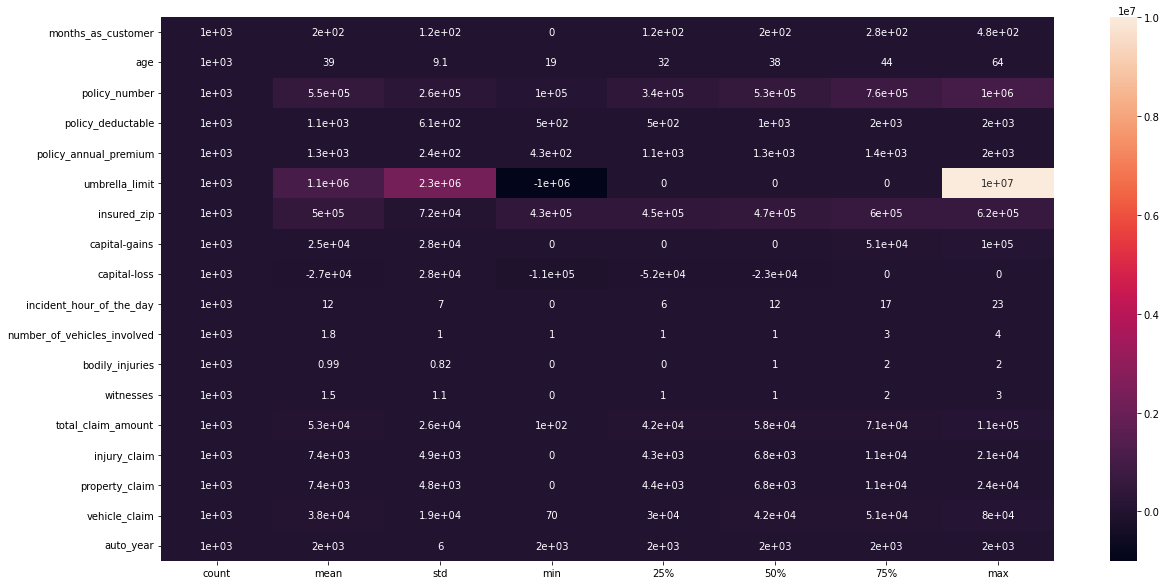

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(dft.describe().T,annot=True,annot_kws={'size':10})
plt.show()

<B>DESCRIBING THE CATEGORICAL COLUMNS!!<BR>

In [12]:
dft.describe(include='O')

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,5,7,7,1000,3,3,14,39,2
top,01-01-2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,02-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


A DETAILED DESCRIPTION OF THE CATEGORICAL COLUMNS CAN BE SEEN IN THE ABOVE DATAFRAME!!<BR>

<B>SPLITTING THE DATASET INTO CONTINUOS COLUMNS AND CATEGORICAL COLUMNS!!<BR>

In [13]:
cont_col=[]
cat_col=[]

In [14]:
for i in dft:
    if(dft[i].dtype=='O'):
        cat_col.append(i)
    else:
        cont_col.append(i)

In [15]:
print(f"THE CONTINUOUS COLUMNS ARE {cont_col}")
print(f"\n\nTHE CATEGORICAL COLUMNS ARE {cat_col}")

THE CONTINUOUS COLUMNS ARE ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


THE CATEGORICAL COLUMNS ARE ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [16]:
feat=[]
uni=[]
total=[]

In [17]:
for i in cat_col:
    feat.append(i)
    uni.append(dft[i].unique())
    total.append(len(dft[i].unique()))

In [18]:
dat=pd.DataFrame()

In [19]:
dat['FEATURES']=feat
dat['UNIQUE CATEGORIES']=uni
dat['TOTAL UNIQUE CATEGORIES']=total

In [20]:
dat

,FEATURES,UNIQUE CATEGORIES,TOTAL UNIQUE CATEGORIES
0,policy_bind_date,"[17-10-2014, 27-06-2006, 06-09-2000, 25-05-199...",951
1,policy_state,"[OH, IN, IL]",3
2,policy_csl,"[250/500, 100/300, 500/1000]",3
3,insured_sex,"[MALE, FEMALE]",2
4,insured_education_level,"[MD, PhD, Associate, Masters, High School, Col...",7
5,insured_occupation,"[craft-repair, machine-op-inspct, sales, armed...",14
6,insured_hobbies,"[sleeping, reading, board-games, bungie-jumpin...",20
7,insured_relationship,"[husband, other-relative, own-child, unmarried...",6
8,incident_date,"[25-01-2015, 21-01-2015, 22-02-2015, 10-01-201...",60
9,incident_type,"[Single Vehicle Collision, Vehicle Theft, Mult...",4


INCIDENT LOCATION HAVE 1000 UNIQUE VALUES!!<BR>
PLOICY_BIND_date too have significant amount of unique values!<br>
IT CAN ALSO BE OBSERVED THAT SOME CATEGORIES HAVE "?" in it which should be converted to nulls!<br>

In [21]:
lis=dft.columns.to_list()

In [22]:
lil=[]
for i in lis:
    for k in dft[i]:
        if(k=='?'):
            lil.append(i)
            print(f"{i} HAVE ? PRESENT IN IT")
            print("\n")
            break
        

collision_type HAVE ? PRESENT IN IT


property_damage HAVE ? PRESENT IN IT


police_report_available HAVE ? PRESENT IN IT




IT CAN BE CLEARLY SEEN THAT<BR>
COLLISION_TYPE <BR>
PROPERTY_DAMAGE<BR>
POLICE_REPORT HAVE "?" PRESENT IN IT!!

In [23]:
dft=dft.replace("?",np.nan)

In [24]:
dft.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

collision_tyep,property_damage ad police_report_avalable have significant amount of nulls present in them and must be handled carefully!!<br>

<B> IMPUTING THE NULLS USING SIMPLE IMPUTER !!

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
si=SimpleImputer(strategy='most_frequent')

In [27]:
lil

['collision_type', 'property_damage', 'police_report_available']

In [28]:
for i in lil:
    dft[i]=si.fit_transform(dft[i].values.reshape(-1,1))

<AxesSubplot:>

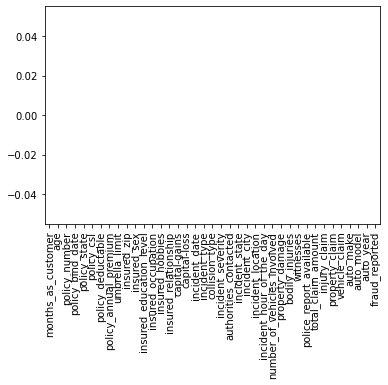

In [29]:
dft.isna().sum().plot(kind='bar')

<B>ALL THE NULLS IMPUTER SUCCESSFULLY!!

<B>CHECKING THE CORRELATION AMONG THE CONTINUOUS FEATURES!!<BR>

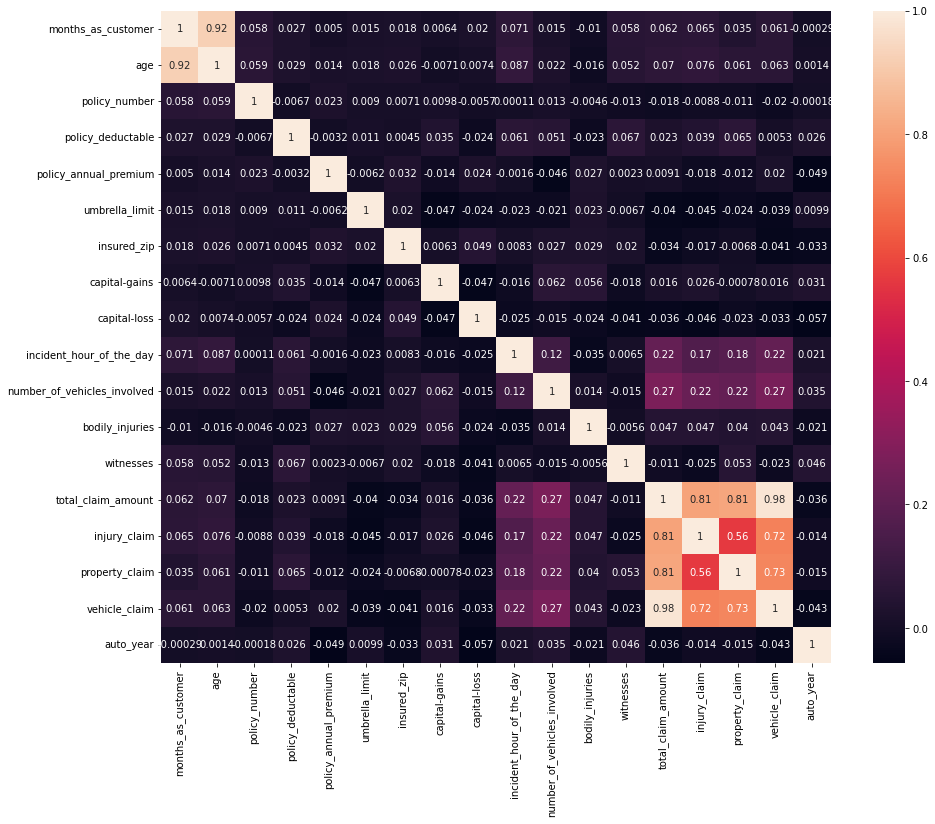

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(dft.corr(),annot=True,annot_kws={'size':10})
plt.show()

A HEATMAP DESCRIBING THE CORRELATION AMONG THE FEATURES CAN BE SEEN ABOVE!!<BR>

ANALYSIS!!<BR>
------------------

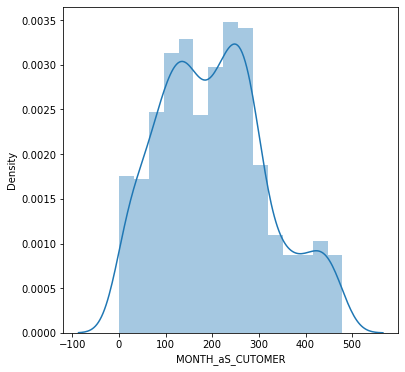

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(x=dft['months_as_customer'])
plt.xlabel('MONTH_aS_CUTOMER')
plt.show()

ITS QUIET OBVIOUS FROM THE DISTRIBUTION PLOT THAT CURVE IS GAUSSIAN AND LITTLE SKEWED TO THE RIGHT!<BR>

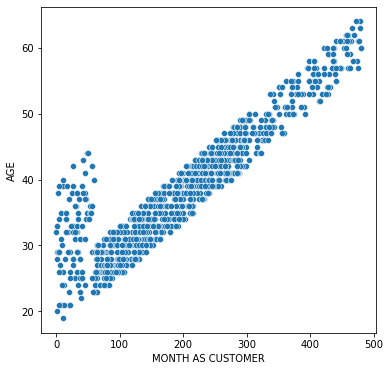

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=dft['months_as_customer'],y=dft['age'])
plt.xlabel('MONTH AS CUSTOMER')
plt.ylabel("AGE")
plt.show()

AGE AND MONTH AS CUSTOMER HAVE DIRECT LINEAR RELATIONSHIP BETWEEN THEM!!<BR>
MORE IS THE AGE MORE IS THE CUSTOMERSHIP PERIOD!!<BR>

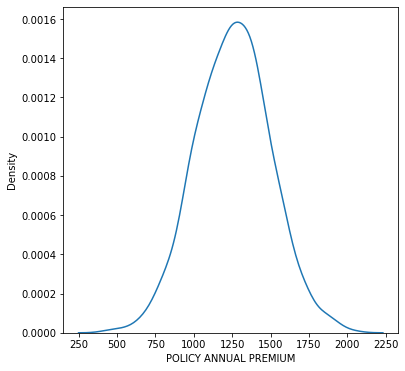

In [33]:
plt.figure(figsize=(6,6))
sns.kdeplot(x=dft['policy_annual_premium'])
plt.xlabel('POLICY ANNUAL PREMIUM')
plt.show()

A PREFECT GAUSSIAN PLOT CAN BE OBSERVED IN THE THE FEATURE!!

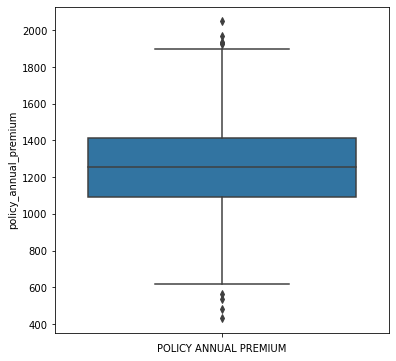

In [34]:
plt.figure(figsize=(6,6))
sns.boxplot(y=dft['policy_annual_premium'])
plt.xlabel('POLICY ANNUAL PREMIUM')
plt.show()

CONSIDERABLE AMOUNT OF OUTLIERS CAN BE OBSERVED IN THE DISTRIBUTION !!

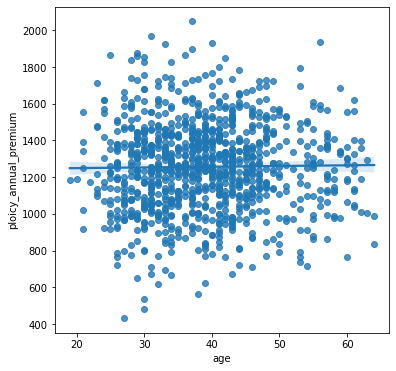

In [35]:
plt.figure(figsize=(6,6))
sns.regplot(x=dft['age'],y=dft['policy_annual_premium'])
plt.xlabel('age')
plt.ylabel("ploicy_annual_premium")
plt.show()

NO SIGNIFICANT PATTERN CAN BE OBSERVED BETWEEN THE TWO AND THE DATA IS MUCH DISTORTED!!

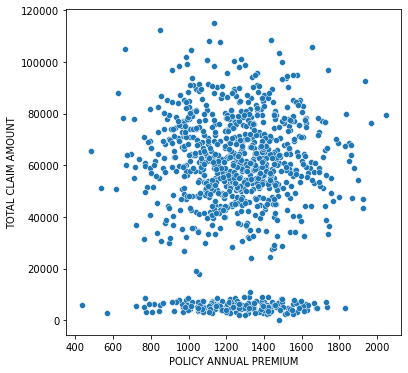

In [36]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=dft['policy_annual_premium'],y=dft['total_claim_amount'])
plt.xlabel('POLICY ANNUAL PREMIUM')
plt.ylabel("TOTAL CLAIM AMOUNT")
plt.show()

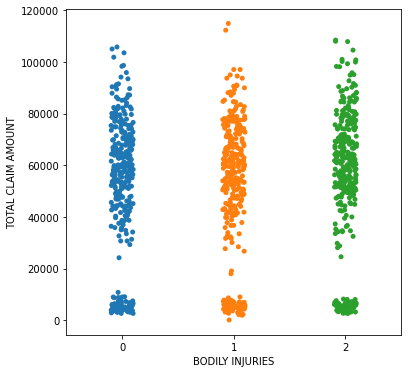

In [37]:
plt.figure(figsize=(6,6))
sns.stripplot(x=dft['bodily_injuries'],y=dft['total_claim_amount'])
plt.xlabel('BODILY INJURIES')
plt.ylabel("TOTAL CLAIM AMOUNT")
plt.show()

A SIMILAR DISTRIBUTION CAN BE OBSERVED IN ALL THE 3 CASES OF BODILY INJURIES !

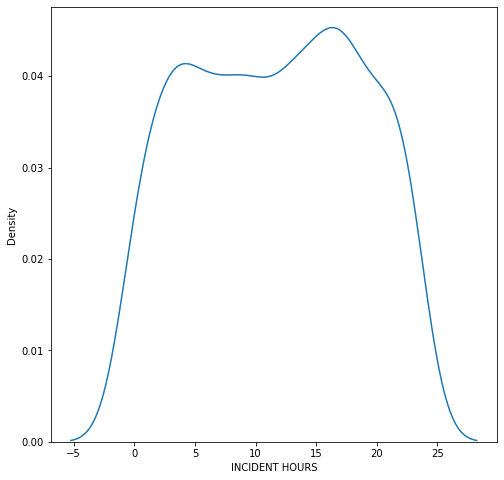

In [38]:
plt.figure(figsize=(8,8))
sns.kdeplot(x=dft['incident_hour_of_the_day'])
plt.xlabel("INCIDENT HOURS")
plt.show()


MOST ACCIDENTS ARE RECORDED BETWEEN 3pm-8m<br>

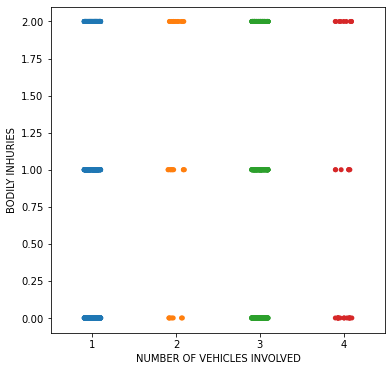

In [39]:
plt.figure(figsize=(6,6))
sns.stripplot(x=dft['number_of_vehicles_involved'],y=dft['bodily_injuries'])
plt.xlabel('NUMBER OF VEHICLES INVOLVED')
plt.ylabel("BODILY INHURIES")
plt.show()

A PLOT DESCRIBING THE RELATIONSHIP BETWEEN THE TWO!!

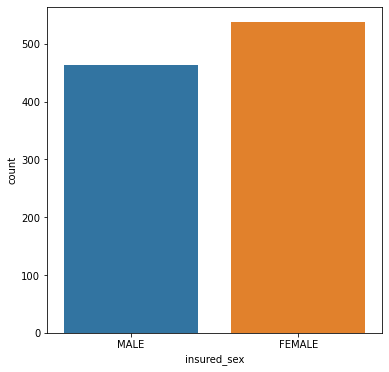

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(x=dft['insured_sex'])
plt.show()

FEMALES ARE MORE LIKELY TO BE INSURED AS COMPARED TO THE MEN!!<BR>


Text(0, 0.5, 'DISTRIBUTION OF DIFFERENT EDUCATION LEVELS!!')

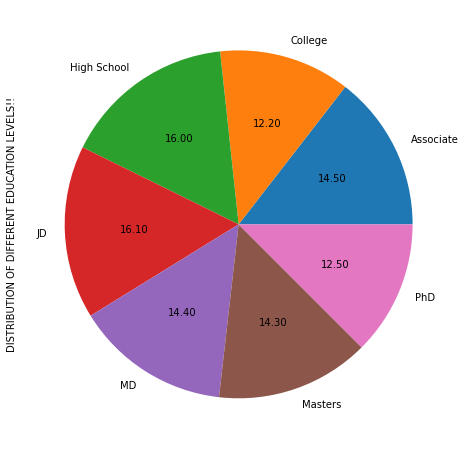

In [41]:
dft.groupby('insured_education_level').size().plot(kind='pie',autopct='%.2f',figsize=(8,8))
plt.ylabel("DISTRIBUTION OF DIFFERENT EDUCATION LEVELS!!")

JURIS DOCTORS HAVE THE HIGHEST COUNT WHEN IT COMES TO INSURANCE COUNT!!<BR>
Those holding a phd have the least count among all!<br>

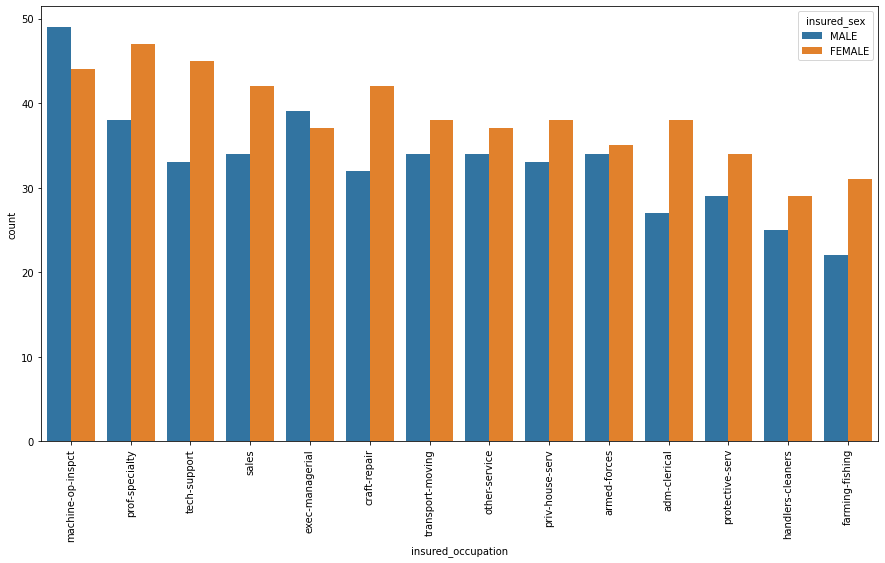

In [42]:
plt.figure(figsize=(15,8))
sns.countplot(x=dft['insured_occupation'],hue=dft['insured_sex'],order=dft['insured_occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Machine-op-inspector got the highesr count in insured_occupation as the job is risky and maybe some govenment policies are making it so to make the insurance compulsory for the employees working on the site!!<br>
farming -fishing is the occupation with the least insured !!<br>

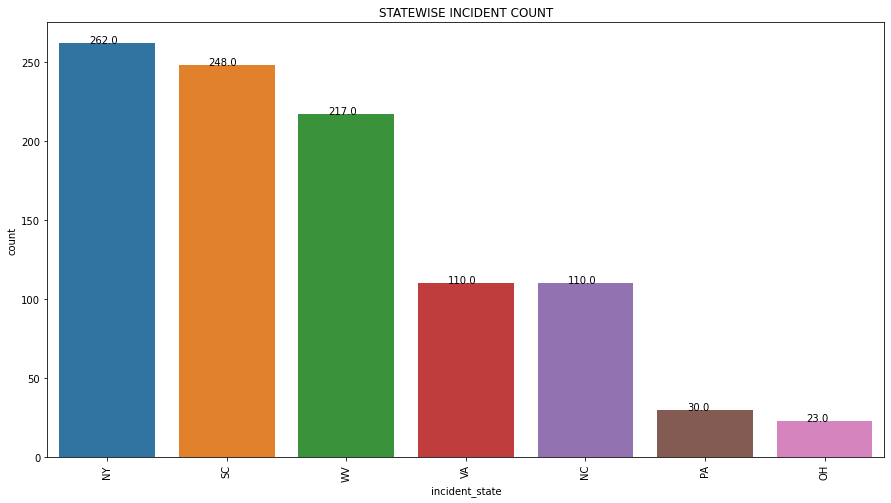

In [43]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x=dft['incident_state'],order=dft['incident_state'].value_counts().index)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("STATEWISE INCIDENT COUNT")
plt.xticks(rotation=90)
plt.show()

NY HAVE THE MOST COUNTS IN ACCIDENT!!<BR>
SC AND WV HAVE THE SECOND AND THIRD HIGHEST COUNTS OF ACCIDENT WITH COUNTS 248 AND 217 RESPECTIVELY!!<BR>
OHIO IS HAVE THE LEAST INCIDENT RATE AND CAN BE CONSIDERED SAFE IN TEMRS OF ROAD ACCIDENTS

Text(0, 0.5, 'DIFFERENT CAR COMPANIES SHARE IN THE MARKET!')

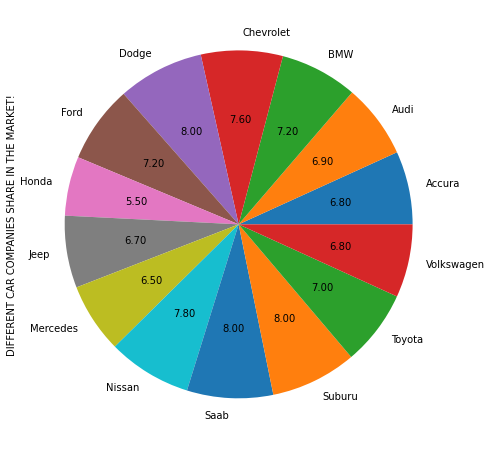

In [44]:
dft.groupby('auto_make').size().plot(kind='pie',autopct='%.2f',figsize=(8,8))
plt.ylabel("DIFFERENT CAR COMPANIES SHARE IN THE MARKET!")

SUBURU,SAAB AND DODGE HAVE THE HIGHEST SHARE IN THE MARKET!!<BR>

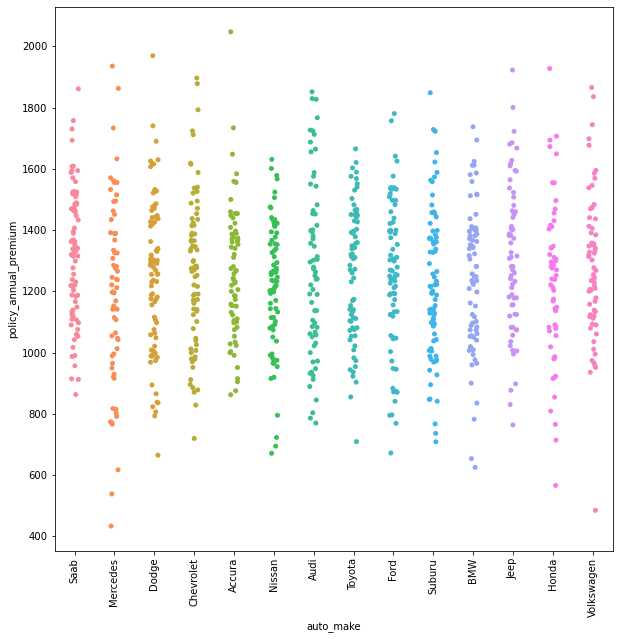

In [45]:
plt.figure(figsize=(10,10))
sns.stripplot(x=dft['auto_make'],y=dft['policy_annual_premium'])
plt.xticks(rotation=90)
plt.show()

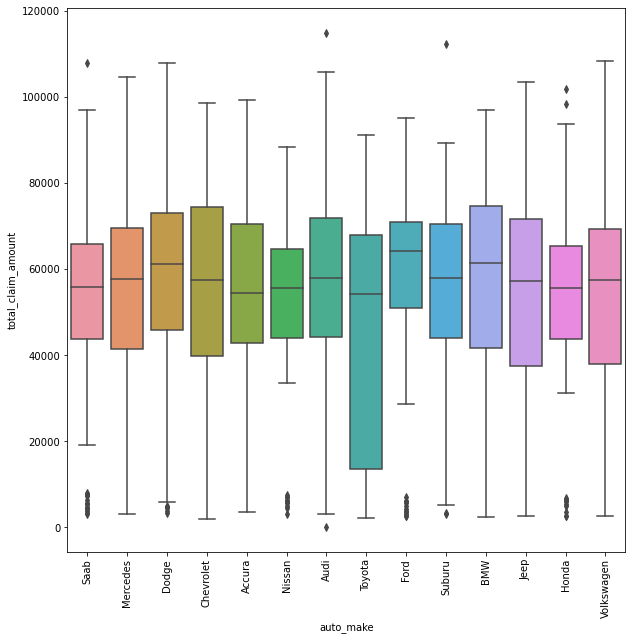

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(x=dft['auto_make'],y=dft['total_claim_amount'])
plt.xticks(rotation=90)
plt.show()

SAAB,DODGE,NISSAN,FORD AND HONDA CAN BE SEEN HAVING CONSIDERABLE AMOUNT OF OUTLIERS IN THE TOTAL CLAIM AMOUNT

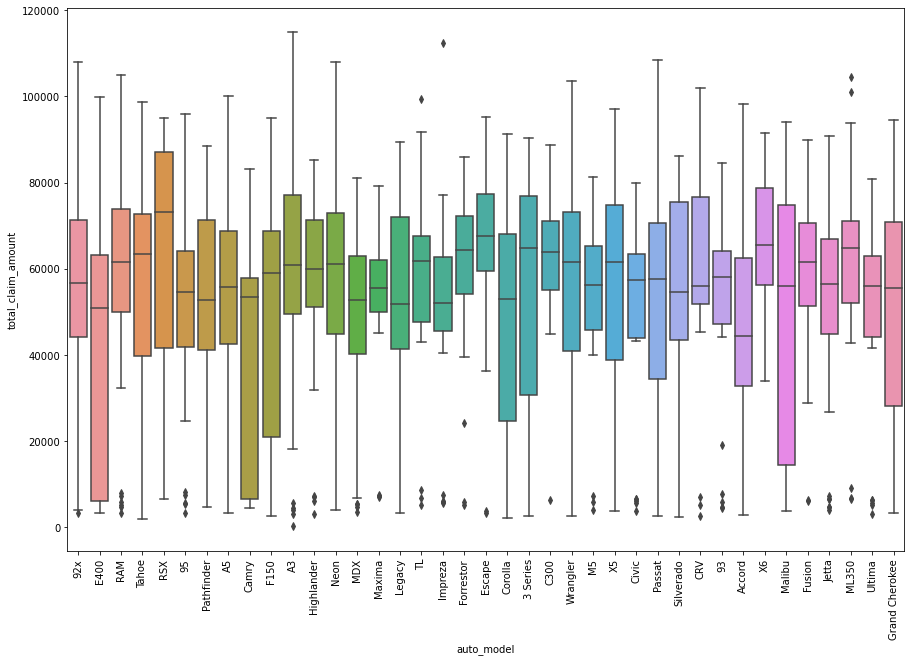

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(x=dft['auto_model'],y=dft['total_claim_amount'])
plt.xticks(rotation=90)
plt.show()

OUTLIERS PRESENT IN TOTAL CLAIM AMOUNT CAN BE SEEN OVER DIFFERENT MODELS!!<BR>

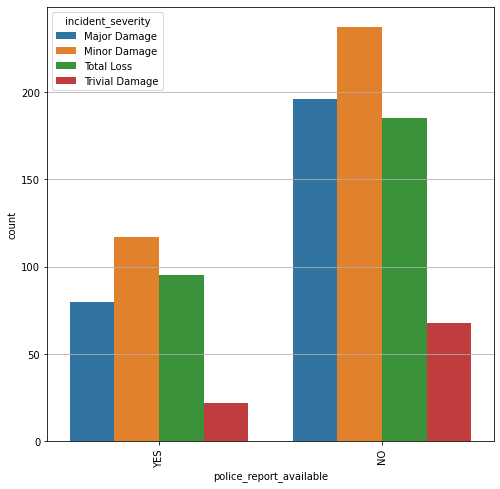

In [48]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.countplot(x=dft['police_report_available'],hue=dft['incident_severity'])
plt.xticks(rotation=90)
plt.show()

In most cases the police report is absent!<br>
Out of those who have police report Minor damage case is among the one!<br>


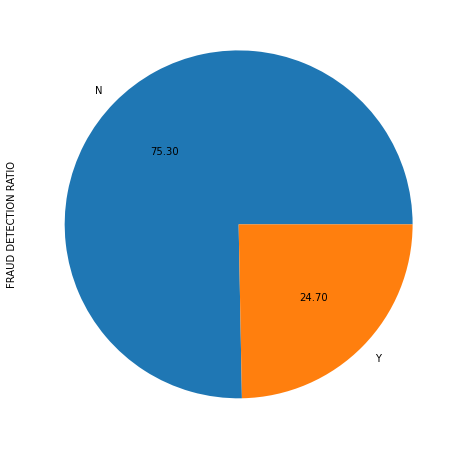

In [49]:
plt.figure(figsize=(8,8))
dft.groupby('fraud_reported').size().plot(kind='pie',autopct="%.2f")
plt.ylabel("FRAUD DETECTION RATIO")
plt.show()

IN 75.30 % CASES THERE IS NO FRAUD DETECTED<BR>
iN 24.70% CASES THERE IS DETECTION OF SOME KIND OF FRAUD AMONG THE INCIDENTS!<BR>

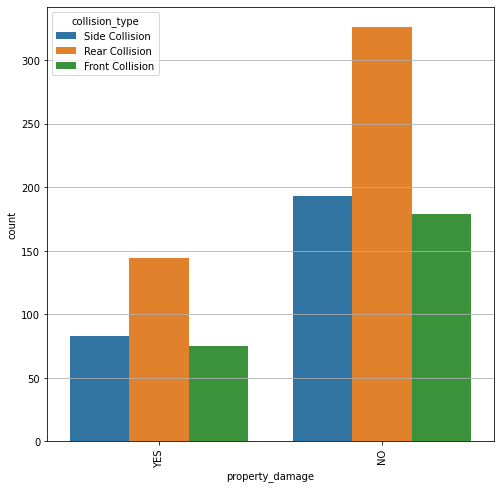

In [50]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.countplot(x=dft['property_damage'],hue=dft['collision_type'])
plt.xticks(rotation=90)
plt.show()

REAR COLLISION IS AMONG THE MOST COMMON TYPE OF COLLISION TYPE!<BR>
IN MAXIMUM CASES THERE IS NO PROPERTY DAMAGE RECORDED!

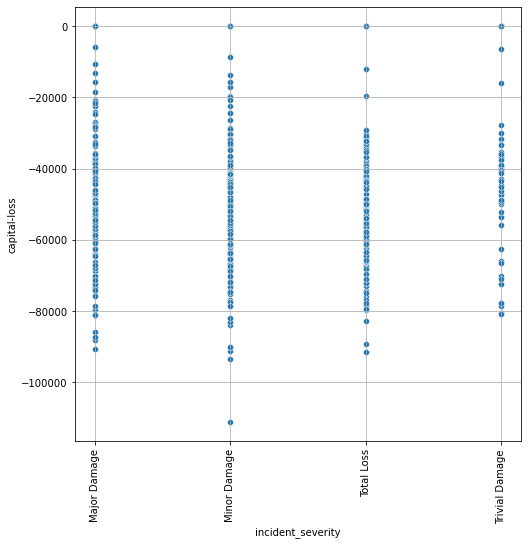

In [51]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.scatterplot(x=dft['incident_severity'],y=dft['capital-loss'])
plt.xticks(rotation=90)
plt.show()

A huge capital loss is observed in case of major damage <br>
Trivial damage have the least loss

ANALYSIS COMPLETE
-------------

<B>ENCODING THE COLUMNS!<BR>

<B> policy_bind_date','Incident_date' using ordinal encoder<br>

In [52]:
date_sorted=sorted(dft['policy_bind_date'].unique())

In [53]:
date_sorted2=sorted(dft['incident_date'].unique())

In [54]:
from sklearn.preprocessing import OrdinalEncoder

In [55]:
oe1=OrdinalEncoder(categories=[date_sorted])
oe2=OrdinalEncoder(categories=[date_sorted2])

In [56]:
dft['policy_bind_date']=oe1.fit_transform(dft['policy_bind_date'].values.reshape(-1,1))

In [57]:
dft['incident_date']=oe2.fit_transform(dft['incident_date'].values.reshape(-1,1))

Encoding all other columns using ordianl encoding too except FraudReported

In [58]:
cat_col.remove('fraud_reported')

In [59]:
cat_col.remove('policy_bind_date')

In [60]:
cat_col.remove('incident_date')

In [61]:
og=OrdinalEncoder()

In [62]:
for i in cat_col:
    dft[i]=og.fit_transform(dft[i].values.reshape(-1,1))

<B>ENCODING THE fraud_reported columns!<br>

In [63]:
ma={value:key for key,value in enumerate(dft['fraud_reported'].value_counts().index)}

In [64]:
dft['fraud_reported']=dft['fraud_reported'].map(ma)

<B>ALL THE CATEGORICAL  COLUMNS ENCODED SUCESSFULLY! 

<B>CHECKING FOR THE SKEWNESS!

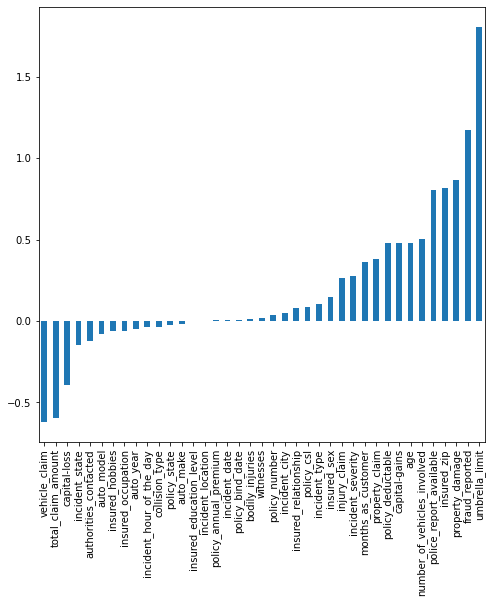

In [65]:
plt.figure(figsize=(8,8))
dft.skew().sort_values().plot(kind='bar')
plt.show()

In [66]:
dft.skew().sort_values()

vehicle_claim                 -0.621098
total_claim_amount            -0.594582
capital-loss                  -0.391472
incident_state                -0.148865
authorities_contacted         -0.121744
auto_model                    -0.080773
insured_hobbies               -0.061563
insured_occupation            -0.058881
auto_year                     -0.048289
incident_hour_of_the_day      -0.035584
collision_type                -0.033682
policy_state                  -0.026177
auto_make                     -0.018797
insured_education_level       -0.000148
incident_location              0.000000
policy_annual_premium          0.004402
incident_date                  0.004756
policy_bind_date               0.005194
bodily_injuries                0.014777
witnesses                      0.019636
policy_number                  0.038991
incident_city                  0.049531
insured_relationship           0.077488
policy_csl                     0.088928
incident_type                  0.101507


<B>STANDARDIZATION USING POWER TRANSFORMER!

In [67]:
from sklearn.preprocessing import PowerTransformer

In [68]:
pt=PowerTransformer()

In [69]:
#splitting the data set into features and label!!


In [70]:
x=dft.drop(['fraud_reported'],axis=1)
y=dft['fraud_reported']

In [71]:
x_scaled=pd.DataFrame(pt.fit_transform(x),columns=x.columns)

In [72]:
x_scaled

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.051279,1.008733,-0.023156,0.295554,1.146048,0.178846,0.067784,0.616676,-0.349113,-5.551115e-16,...,0.108332,0.517616,1.478078,0.715714,0.005762,1.081793,0.753697,0.859111,-1.808345,-0.197455
1,0.304536,0.431433,-0.745292,1.182937,0.071806,0.178846,1.271863,-0.242577,1.357817,-4.996004e-16,...,-1.254857,-1.410682,-0.676554,-1.776979,-1.525347,-1.557391,-1.786629,0.418616,-0.586225,0.302622
2,-0.511226,-1.139513,0.587931,-1.005000,1.146048,-1.237596,1.271863,0.642206,1.357817,-1.720846e-15,...,1.178068,1.290743,-0.676554,-0.716825,0.223833,-0.577507,-0.820881,-0.555149,0.944905,0.302622
3,0.523344,0.327852,-1.266438,1.022376,-1.259374,0.178846,1.271863,0.652860,1.644005,2.164935e-15,...,0.108332,0.517616,-0.676554,0.391426,-0.026762,-0.034793,0.677602,-0.828189,1.252785,1.497810
4,0.304536,0.631918,-0.640684,-1.027579,-1.259374,1.230487,0.067784,1.342030,1.644005,2.164935e-15,...,-1.254857,-0.355794,-0.676554,-1.729802,-1.304154,-1.622102,-1.740038,-1.809810,1.022679,0.640027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,1.449469,0.145616,1.146048,1.230487,0.067784,0.222833,-0.349113,-1.720846e-15,...,-1.254857,-0.355794,-0.676554,1.338829,1.638435,0.403281,1.259186,-0.049272,-1.194088,0.135129
996,0.741446,0.327852,-1.468221,-1.274913,-1.259374,-1.237596,0.067784,0.739122,-0.349113,2.164935e-15,...,1.178068,1.290743,-0.676554,2.202447,1.717091,1.767003,1.904757,1.481528,0.787622,1.671841
997,-0.549706,-0.470444,1.373308,0.219413,1.146048,0.178846,-1.211269,0.520703,0.756509,-1.276756e-15,...,1.178068,1.290743,1.478078,0.553012,0.188267,0.186095,0.777232,1.071136,0.045463,-1.496278
998,1.912654,2.130554,0.023977,0.428897,-1.259374,1.230487,1.271863,0.411823,1.357817,-1.276756e-15,...,-1.254857,-0.355794,1.478078,-0.247520,-0.251353,-0.265012,-0.104258,-1.440763,-1.305341,-1.176246


In [73]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

<B>OUTLIER HANDLING!<BR>

In [74]:
dft=pd.concat([x_scaled,y],axis=1)

In [75]:
df_new=dft.copy()

In [76]:
print(f"The shape of the dataset before outlier removal is {df_new.shape}")

The shape of the dataset before outlier removal is (1000, 39)


In [77]:
from scipy.stats import zscore

In [78]:
z=np.abs(zscore(df_new))

In [79]:
df_new=df_new[(z<3).all(axis=1)]

In [80]:
print(f"The shape of the dataset after outlier removal is {df_new.shape}")

The shape of the dataset after outlier removal is (996, 39)


In [89]:
print(f"LOSS AFTER OUTLIER REMOVAL IS {(1000-996)/1000*100}")

LOSS AFTER OUTLIER REMOVAL IS 0.4


SINCE THE LOSS IS LESS THAN 5 % WE WILL CONTINUE WITH THIS DATASET!<BR>

In [92]:
x_scaled=df_new.drop(['fraud_reported'],axis=1)

In [93]:
y=df_new['fraud_reported']

<B>FEATURE SELECTION!

In [94]:
from sklearn.feature_selection import SelectKBest,f_classif

In [95]:
sel=SelectKBest(score_func=f_classif,k=25)

In [96]:
fit=sel.fit(x_scaled,y)

GETTING THE INDICES OF THE BEST 25 FEATURES AND SAVING IT IN cols LIST

In [97]:
col=fit.get_support(indices=True)

In [98]:
print(f'top {25} features indices are {col}')

top 25 features indices are [ 2  3  4  5  8  9 10 13 14 16 17 18 20 21 22 23 26 28 29 30 31 32 33 34
 35]


In [100]:
features=x_scaled.columns[col]

In [102]:
print(f' BEST {len(col)} FEATURES ARE AS FOLLOWS :  \n\n{list(features)} ')

 BEST 25 FEATURES ARE AS FOLLOWS :  

['policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_hobbies', 'insured_relationship', 'capital-loss', 'incident_date', 'incident_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make'] 


In [103]:
features_scores=pd.DataFrame()
features_scores['FEATURES']=x_scaled.columns
features_scores['SCORES']=fit.scores_

In [104]:
features_scores.sort_values(by='SCORES',ascending=False,inplace=True)

TOP 25 FEATURES AND SCORES ARE AS FOLLOWS

In [106]:
features_scores[:25+1]

,FEATURES,SCORES
20,incident_severity,236.985146
34,vehicle_claim,29.387311
31,total_claim_amount,26.941086
33,property_claim,21.457315
32,injury_claim,10.186475
8,umbrella_limit,3.444965
3,policy_bind_date,3.000637
29,witnesses,2.847234
22,incident_state,2.552972
17,incident_date,2.519482


In [107]:
x_scaled=x_scaled[features]

In [108]:
x_scaled.head()

,policy_number,policy_bind_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_hobbies,insured_relationship,capital-loss,...,incident_city,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make
0,-0.023156,0.295554,1.146048,0.178846,-0.349113,-5.551115e-16,1.076953,1.227979,-1.564840,1.049532,...,-0.927320,-0.843679,0.108332,0.517616,1.478078,0.715714,0.005762,1.081793,0.753697,0.859111
1,-0.745292,1.182937,0.071806,0.178846,1.357817,-4.996004e-16,1.076953,0.920483,-0.148985,1.049532,...,0.981620,-0.843679,-1.254857,-1.410682,-0.676554,-1.776979,-1.525347,-1.557391,-1.786629,0.418616
2,0.587931,-1.005000,1.146048,-1.237596,1.357817,-1.720846e-15,-0.928546,-1.402398,0.419779,1.049532,...,-0.927320,1.189521,1.178068,1.290743,-0.676554,-0.716825,0.223833,-0.577507,-0.820881,-0.555149
3,-1.266438,1.022376,-1.259374,0.178846,1.644005,2.164935e-15,-0.928546,-1.402398,0.939708,-1.005137,...,-1.591655,-0.843679,0.108332,0.517616,-0.676554,0.391426,-0.026762,-0.034793,0.677602,-0.828189
4,-0.640684,-1.027579,-1.259374,1.230487,1.644005,2.164935e-15,1.076953,-1.402398,0.939708,-0.940361,...,-1.591655,-0.843679,-1.254857,-0.355794,-0.676554,-1.729802,-1.304154,-1.622102,-1.740038,-1.809810


<B> MULTICOLLINEARITY!!

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
vif=pd.DataFrame()

vif['FEATURES']=x_scaled.columns

vif['SCORE']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [120]:
vif

,FEATURES,SCORE
0,policy_number,1.021062
1,policy_bind_date,1.019142
2,policy_state,1.025248
3,policy_csl,1.021437
4,umbrella_limit,1.022281
5,insured_zip,1.024944
6,insured_sex,1.019733
7,insured_hobbies,1.037241
8,insured_relationship,1.041657
9,capital-loss,1.022651


<B>DROPPING VEHICLE_CLAIM AS ITS HAVE HIGH COLLINEARITY WITH TOTAL_CLAIM_AMOUNT

In [121]:
x_scaled.drop(['vehicle_claim'],axis=1,inplace=True)

In [122]:
vif=pd.DataFrame()

vif['FEATURES']=x_scaled.columns

vif['SCORE']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [123]:
vif

,FEATURES,SCORE
0,policy_number,1.020982
1,policy_bind_date,1.019087
2,policy_state,1.024948
3,policy_csl,1.019673
4,umbrella_limit,1.021946
5,insured_zip,1.017781
6,insured_sex,1.018808
7,insured_hobbies,1.033338
8,insured_relationship,1.041551
9,capital-loss,1.022023


SINCE ALL THE VALUES ARE LESS THAN 10% WE CAN BE ASSURED THAT WE HAVE CONTROLLED MULTI-COLLINEARITY SUCCESSFULLY!!

MODEL 1)LOGISTIC REGRESSION
--------------------

In [124]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [125]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 9


TRAINING ACCURACY IS -79.52  --AND TESTING ACCURACY IS 79.5


AT RANDOM STATE-- 171


TRAINING ACCURACY IS -80.53  --AND TESTING ACCURACY IS 80.5


AT RANDOM STATE-- 281


TRAINING ACCURACY IS -80.03  --AND TESTING ACCURACY IS 80.0


AT RANDOM STATE-- 469


TRAINING ACCURACY IS -80.53  --AND TESTING ACCURACY IS 80.5


AT RANDOM STATE-- 477


TRAINING ACCURACY IS -80.53  --AND TESTING ACCURACY IS 80.5


AT RANDOM STATE-- 718


TRAINING ACCURACY IS -80.03  --AND TESTING ACCURACY IS 80.0


AT RANDOM STATE-- 719


TRAINING ACCURACY IS -80.03  --AND TESTING ACCURACY IS 80.0


AT RANDOM STATE-- 734


TRAINING ACCURACY IS -80.53  --AND TESTING ACCURACY IS 80.5


AT RANDOM STATE-- 910


TRAINING ACCURACY IS -79.52  --AND TESTING ACCURACY IS 79.5


AT RANDOM STATE-- 947


TRAINING ACCURACY IS -81.53  --AND TESTING ACCURACY IS 81.5


AT RANDOM STATE-- 973


TRAINING ACCURACY IS -79.52  --AND TESTING ACCURACY IS 79.5


TAKING RANDOM STATE AS 947!!

In [133]:
ran=947

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=947)

In [127]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TRAINIG')
        print('\n\n',confusion_matrix(y_train,y_pred))
        print('\n\nCLASSIFICATION REPORT for training --')
        print('\n\n',classification_report(y_train,y_pred))
        
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TESTING')
        print('\n\n',confusion_matrix(y_test,y_pred))
        print('\n\nCLASSIFICATION REPORT for testing --')
        print('\n\n',classification_report(y_test,y_pred))

In [128]:
lr=LogisticRegression()

In [129]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 81.53


CONFUSION MATRIX FOR THE TRAINIG


 [[544  50]
 [ 97 105]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.85      0.92      0.88       594
           1       0.68      0.52      0.59       202

    accuracy                           0.82       796
   macro avg       0.76      0.72      0.73       796
weighted avg       0.81      0.82      0.81       796



Testing SCORE FOR THE LogisticRegression() is 81.5


CONFUSION MATRIX FOR THE TESTING


 [[142  14]
 [ 23  21]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.86      0.91      0.88       156
           1       0.60      0.48      0.53        44

    accuracy                           0.81       200
   macro avg       0.73      0.69      0.71       200
weighted avg       0.80      0.81      0.81       200



CROSS VAL SCORES VALUATION

In [130]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  79.22

TEST ACCURACY SCORE IS  81.5
-------------

AT CV = 3

CROSS VAL SCORE IS  78.51

TEST ACCURACY SCORE IS  81.5
-------------

AT CV = 4

CROSS VAL SCORE IS  78.71

TEST ACCURACY SCORE IS  81.5
-------------

AT CV = 5

CROSS VAL SCORE IS  79.32

TEST ACCURACY SCORE IS  81.5
-------------

AT CV = 6

CROSS VAL SCORE IS  79.02

TEST ACCURACY SCORE IS  81.5
-------------

AT CV = 7

CROSS VAL SCORE IS  79.22

TEST ACCURACY SCORE IS  81.5
-------------

AT CV = 8

CROSS VAL SCORE IS  78.62

TEST ACCURACY SCORE IS  81.5
-------------

AT CV = 9

CROSS VAL SCORE IS  78.82

TEST ACCURACY SCORE IS  81.5
-------------

AT CV = 10

CROSS VAL SCORE IS  79.33

TEST ACCURACY SCORE IS  81.5
-------------


TAKING CV=4

In [131]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

cross_val=cross_val_score(lr,x_scaled,y,cv=4).mean()

In [134]:
print(f'\nAt random state {ran} and CV :{5}')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)


At random state 947 and CV :5

CROSS VAL SCORE IS  78.71

TEST ACCURACY SCORE IS  81.5


MODEL 2)---DECISION TREE MODELING
----------------------

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dt=DecisionTreeClassifier()

In [137]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [138]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[594   0]
 [  0 202]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       202

    accuracy                           1.00       796
   macro avg       1.00      1.00      1.00       796
weighted avg       1.00      1.00      1.00       796



Testing SCORE FOR THE DecisionTreeClassifier() is 75.0


CONFUSION MATRIX FOR THE TESTING


 [[125  31]
 [ 19  25]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.87      0.80      0.83       156
           1       0.45      0.57      0.50        44

    accuracy                           0.75       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.78      0.75      0.76       200



Hyper Parameter tuning
---------------------

In [139]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [140]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':np.arange(18,25),
      'min_samples_split':[3,4,5,6,7],
     'min_samples_leaf':np.arange(6,10)}

In [143]:
dgsc=GridSearchCV(dt,param_grid=para)

In [144]:
dgsc.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([18, 19, 20, 21, 22, 23, 24]),
                         'min_samples_leaf': array([6, 7, 8, 9]),
                         'min_samples_split': [3, 4, 5, 6, 7]})

In [145]:
dgsc.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'min_samples_leaf': 8,
 'min_samples_split': 5}

In [146]:
dt=dgsc.best_estimator_

In [147]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(max_depth=21, min_samples_leaf=8, min_samples_split=5) is 89.82


CONFUSION MATRIX FOR THE TRAINIG


 [[562  32]
 [ 49 153]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.92      0.95      0.93       594
           1       0.83      0.76      0.79       202

    accuracy                           0.90       796
   macro avg       0.87      0.85      0.86       796
weighted avg       0.90      0.90      0.90       796



Testing SCORE FOR THE DecisionTreeClassifier(max_depth=21, min_samples_leaf=8, min_samples_split=5) is 84.0


CONFUSION MATRIX FOR THE TESTING


 [[140  16]
 [ 16  28]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.90      0.90      0.90       156
           1       0.64      0.64      0.64        44

    accuracy                           0.84       200
   macro avg       0.77   

THE DIFFERENCE BETWEEN TRAINING AND TESTING ACCURACY HAVE REDUCED DRASTICALLY!<BR>
TESTING SCORES HAS INCREASED WITH REDUCTION IN FALSE POSITICES AND NEGATIVES!

In [148]:
test_pred=dt.predict(x_test)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(dt,x_scaled,y,cv=4).mean()

In [149]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)


CROSS VAL SCORE IS  82.13

TEST ACCURACY SCORE IS  84.0


DIFFERENCE BETWEEN CROSS VAL SCORES AND TESTING ACCURACY SCORES HAS REDUCED!

MODEL 3) RANDOM FOREST CLASSIFIER
--------------

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
rfc=RandomForestClassifier()

In [152]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [153]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [154]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[594   0]
 [  0 202]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       202

    accuracy                           1.00       796
   macro avg       1.00      1.00      1.00       796
weighted avg       1.00      1.00      1.00       796



Testing SCORE FOR THE RandomForestClassifier() is 81.0


CONFUSION MATRIX FOR THE TESTING


 [[144  12]
 [ 26  18]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.85      0.92      0.88       156
           1       0.60      0.41      0.49        44

    accuracy                           0.81       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.79      0.81      0.80       200



HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER --------------------------

In [155]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [156]:
rfc=RandomForestClassifier()

In [164]:
parma={"n_estimators":[50,60,75,80,59],
       "min_samples_split":[3,5,6],
       "min_samples_leaf":[3,5,8],
       "bootstrap":[True,False],
       "criterion":["gini", "entropy", "log_loss"],
       }

In [165]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [166]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [3, 5, 8],
                         'min_samples_split': [3, 5, 6],
                         'n_estimators': [50, 60, 75, 80, 59]})

In [167]:
rgsc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 60}

In [168]:
rfc=rgsc.best_estimator_

In [169]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=60) is 99.75


CONFUSION MATRIX FOR THE TRAINIG


 [[594   0]
 [  2 200]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      0.99      1.00       202

    accuracy                           1.00       796
   macro avg       1.00      1.00      1.00       796
weighted avg       1.00      1.00      1.00       796



Testing SCORE FOR THE RandomForestClassifier(bootstrap=False, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=60) is 80.5


CONFUSION MATRIX FOR THE TESTING


 [[145  11]
 [ 28  16]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.84      0.93      0.88       156
           1       0.59      0.36      0.45      

In [170]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

cross_val=cross_val_score(rfc,x_scaled,y,cv=4).mean()

In [171]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  78.31

TEST ACCURACY SCORE IS  80.5


MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------

In [172]:
from sklearn.ensemble import BaggingClassifier

In [173]:
bc=BaggingClassifier()

In [174]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier() is 98.62


CONFUSION MATRIX FOR THE TRAINIG


 [[589   5]
 [  6 196]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.99      0.99      0.99       594
           1       0.98      0.97      0.97       202

    accuracy                           0.99       796
   macro avg       0.98      0.98      0.98       796
weighted avg       0.99      0.99      0.99       796



Testing SCORE FOR THE BaggingClassifier() is 83.0


CONFUSION MATRIX FOR THE TESTING


 [[139  17]
 [ 17  27]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.89      0.89      0.89       156
           1       0.61      0.61      0.61        44

    accuracy                           0.83       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.83      0.83      0.83       200



HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER
-----------------

In [175]:
bc=BaggingClassifier()

In [177]:
par={"n_estimators":np.arange(50,60),
    "oob_score":[True,False],
    "random_state":[200,411,211,224],
     "bootstrap":[True,False]
    }

In [178]:
bcgs=GridSearchCV(bc,param_grid=par)

In [179]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False],
                         'random_state': [200, 411, 211, 224]})

In [180]:
bcgs.best_params_

{'bootstrap': True, 'n_estimators': 51, 'oob_score': True, 'random_state': 211}

In [181]:
bc=bcgs.best_estimator_

In [182]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=51, oob_score=True, random_state=211) is 99.87


CONFUSION MATRIX FOR THE TRAINIG


 [[594   0]
 [  1 201]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       202

    accuracy                           1.00       796
   macro avg       1.00      1.00      1.00       796
weighted avg       1.00      1.00      1.00       796



Testing SCORE FOR THE BaggingClassifier(n_estimators=51, oob_score=True, random_state=211) is 84.0


CONFUSION MATRIX FOR THE TESTING


 [[135  21]
 [ 11  33]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.92      0.87      0.89       156
           1       0.61      0.75      0.67        44

    accuracy                           0.84       200
   macro avg       0.77      0.81      0.78 

IT CAN BE SEEN THAT THE ACCURACY SCORE HAVE INCREASED SLIGHTLY SO WE WILL KEEP THESE PARAMETERS

In [183]:
test_pred=bc.predict(x_test)
bc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

In [184]:
cross_val=cross_val_score(bc,x_scaled,y,cv=4).mean()

In [185]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",bc_test_accuracy)


CROSS VAL SCORE IS  83.23

TEST ACCURACY SCORE IS  84.0


MODEL 5)----KNN
-----------------------------

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
knn=KNeighborsClassifier()

In [188]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [189]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier() is 80.78


CONFUSION MATRIX FOR THE TRAINIG


 [[570  24]
 [129  73]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.82      0.96      0.88       594
           1       0.75      0.36      0.49       202

    accuracy                           0.81       796
   macro avg       0.78      0.66      0.68       796
weighted avg       0.80      0.81      0.78       796



Testing SCORE FOR THE KNeighborsClassifier() is 74.5


CONFUSION MATRIX FOR THE TESTING


 [[141  15]
 [ 36   8]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.80      0.90      0.85       156
           1       0.35      0.18      0.24        44

    accuracy                           0.74       200
   macro avg       0.57      0.54      0.54       200
weighted avg       0.70      0.74      0.71       200



HYPER PARAMETER TUNING THE PARAMETERS

In [190]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [191]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(3,6),
    'leaf_size':[25,28,30,32,35,38]}

In [192]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [193]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 28, 30, 32, 35, 38],
                         'n_neighbors': array([3, 4, 5])})

In [194]:
kgsc.best_params_
knn=kgsc.best_estimator_

In [195]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 79.9


CONFUSION MATRIX FOR THE TRAINIG


 [[585   9]
 [151  51]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.79      0.98      0.88       594
           1       0.85      0.25      0.39       202

    accuracy                           0.80       796
   macro avg       0.82      0.62      0.63       796
weighted avg       0.81      0.80      0.76       796



Testing SCORE FOR THE KNeighborsClassifier(leaf_size=25, n_neighbors=4) is 75.0


CONFUSION MATRIX FOR THE TESTING


 [[146  10]
 [ 40   4]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.78      0.94      0.85       156
           1       0.29      0.09      0.14        44

    accuracy                           0.75       200
   macro avg       0.54      0.51      0.50       200
weighted avg       0.68      

In [196]:
test_pred=knn.predict(x_test)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(knn,x_scaled,y,cv=4).mean()

In [197]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)


CROSS VAL SCORE IS  74.7

TEST ACCURACY SCORE IS  75.0


MODEL 6) SVC
-----------------

In [198]:
from sklearn.svm import SVC

In [199]:
svc=SVC()

In [200]:
svc.fit(x_train,y_train)

SVC()

In [201]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 89.32


CONFUSION MATRIX FOR THE TRAINIG


 [[580  14]
 [ 71 131]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.89      0.98      0.93       594
           1       0.90      0.65      0.76       202

    accuracy                           0.89       796
   macro avg       0.90      0.81      0.84       796
weighted avg       0.89      0.89      0.89       796



Testing SCORE FOR THE SVC() is 79.5


CONFUSION MATRIX FOR THE TESTING


 [[144  12]
 [ 29  15]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.83      0.92      0.88       156
           1       0.56      0.34      0.42        44

    accuracy                           0.80       200
   macro avg       0.69      0.63      0.65       200
weighted avg       0.77      0.80      0.78       200



In [202]:
test_pred=svc.predict(x_test)
svc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(svc,x_scaled,y,cv=4).mean()

In [203]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)


CROSS VAL SCORE IS  78.31

TEST ACCURACY SCORE IS  79.5


MODEL 7) ADABOOSTCLASSIFIER
------------------

In [204]:
from sklearn.ensemble import AdaBoostClassifier

In [205]:
adc=AdaBoostClassifier()

In [206]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [207]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier() is 86.18


CONFUSION MATRIX FOR THE TRAINIG


 [[550  44]
 [ 66 136]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.89      0.93      0.91       594
           1       0.76      0.67      0.71       202

    accuracy                           0.86       796
   macro avg       0.82      0.80      0.81       796
weighted avg       0.86      0.86      0.86       796



Testing SCORE FOR THE AdaBoostClassifier() is 80.5


CONFUSION MATRIX FOR THE TESTING


 [[142  14]
 [ 25  19]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.85      0.91      0.88       156
           1       0.58      0.43      0.49        44

    accuracy                           0.81       200
   macro avg       0.71      0.67      0.69       200
weighted avg       0.79      0.81      0.79       200



HYPER PARAMETER TUNING!
-------------

In [208]:
par={"n_estimators":np.arange(50,60),
    "learning_rate":np.arange(0.01,0.1,0.001)}

In [210]:
adgs=GridSearchCV(adc,param_grid=par)

In [211]:
adgs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
       0.1  ]),
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59])})

In [212]:
adgs.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [213]:
adc=adgs.best_estimator_

In [214]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(learning_rate=0.01) is 81.03


CONFUSION MATRIX FOR THE TRAINIG


 [[506  88]
 [ 63 139]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.89      0.85      0.87       594
           1       0.61      0.69      0.65       202

    accuracy                           0.81       796
   macro avg       0.75      0.77      0.76       796
weighted avg       0.82      0.81      0.81       796



Testing SCORE FOR THE AdaBoostClassifier(learning_rate=0.01) is 81.5


CONFUSION MATRIX FOR THE TESTING


 [[136  20]
 [ 17  27]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.89      0.87      0.88       156
           1       0.57      0.61      0.59        44

    accuracy                           0.81       200
   macro avg       0.73      0.74      0.74       200
weighted avg       0.82      0.81      0.82       

In [215]:
test_pred=adc.predict(x_test)
adc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(adc,x_scaled,y,cv=4).mean()

In [216]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",adc_test_accuracy)


CROSS VAL SCORE IS  81.12

TEST ACCURACY SCORE IS  81.5


------------PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG------------
---

In [217]:
from sklearn.metrics import plot_roc_curve

ROC CURVE FOR TRAINING

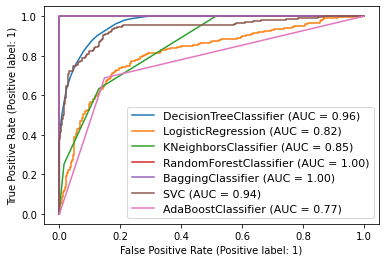

In [218]:
disp=plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

ROC CURVE FOR TESTING

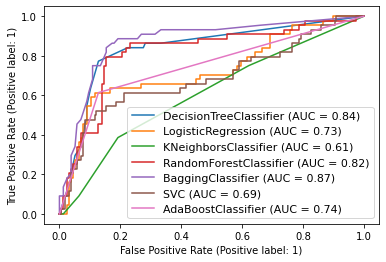

In [219]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

CONCLUSION-<BR>
--------------------
SINCE FOR ADABOOSTCLASSIFIER  THE DIFFERENCE BETWEEN THE CROSS VAL SCORE AND THE ACCURACY SCORE IS CONSIDERABLY LOWER AND THE DIFFERENCE BETWEEN THE TRAINING AND TESTTING SCORE IS THE LOWEST<BR><BR>
INDIVIDUAL TRAINING AND TESTING SCORES ARE AMONG THE HIGHEST GIVING IT A EDGE OVER OTHER MODELS<BR><BR>
ALSO IT MUST BE NOTED THAT FALSE POITIVES AND FALSE NEGATIVES SIGNIFICANTLY LOWER IN KNN AND THE AUC SCORES ARE ALSO SAME <BR><BR>
THESE FACTORS MAKE US CHOOSE LOGISTIC REGRESSION AS OUR BEST MODEL FOR THIS PROBLEM

In [220]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(learning_rate=0.01) is 81.03


CONFUSION MATRIX FOR THE TRAINIG


 [[506  88]
 [ 63 139]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.89      0.85      0.87       594
           1       0.61      0.69      0.65       202

    accuracy                           0.81       796
   macro avg       0.75      0.77      0.76       796
weighted avg       0.82      0.81      0.81       796



Testing SCORE FOR THE AdaBoostClassifier(learning_rate=0.01) is 81.5


CONFUSION MATRIX FOR THE TESTING


 [[136  20]
 [ 17  27]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.89      0.87      0.88       156
           1       0.57      0.61      0.59        44

    accuracy                           0.81       200
   macro avg       0.73      0.74      0.74       200
weighted avg       0.82      0.81      0.82       

In [221]:
test_pred=adc.predict(x_test)
adc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(adc,x_scaled,y,cv=4).mean()

In [223]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",adc_test_accuracy)


CROSS VAL SCORE IS  81.12

TEST ACCURACY SCORE IS  81.5


SAVING THE MODEL
------------------

In [225]:
import pickle

In [226]:
with open('svvc', 'wb') as files:
    pickle.dump(svc, files)

END OF PROJECT
=